<a href="https://colab.research.google.com/github/Jaacoo/DataAnalysis_LinRegression/blob/master/DataAnalysisAndRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

#Importing SciPy for scientifing computation (mathematical algorithms)
#Subpackage 'stats' contains probability distributions and statistical functions
from scipy import stats
#'norm' is a probability density function 
from scipy.stats import norm

#Sklearn helpers for data and model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importing train and test set
train_set_raw = pd.read_csv('/content/drive/My Drive/HousePrices/train.csv')
test_set_raw = pd.read_csv('/content/drive/My Drive/HousePrices/test.csv')

In [3]:
test_set_raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
#Separating target and features in train set
#train_target = train_set_raw['SalePrice']
#train_set = train_set_raw.drop('SalePrice', axis = 1)

**Exploring and visualizing dependencies**

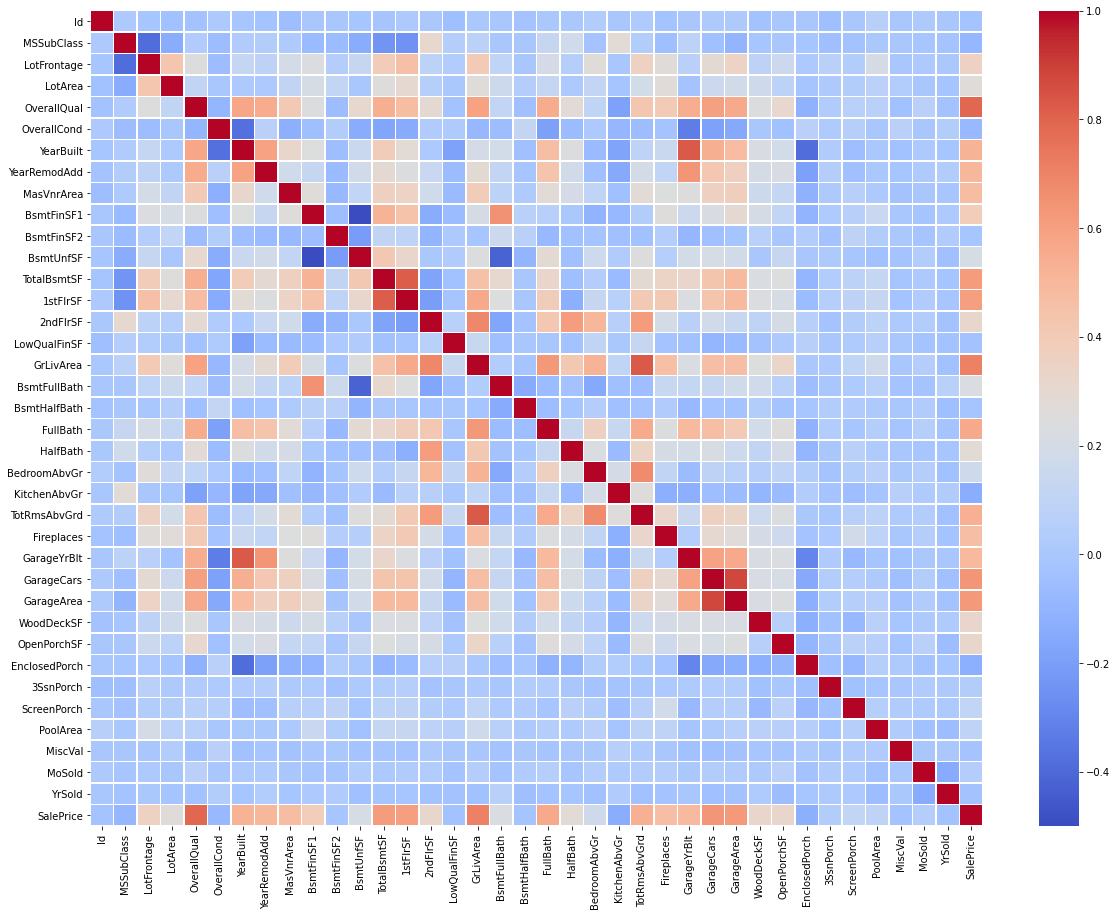

In [5]:
#creating a correlation matrix to visualize all dependencies
#with this heatmap it is easy to see which features have the most impact on 'SalePrice'
#corr() returns a dataframe which is containing the correlation between the variables
#in the original data frame
plt.figure(figsize=(20,15))
sns.heatmap(train_set_raw.corr(), vmin=-0.5, vmax=1.0, linewidths=0.5, cmap='coolwarm')

From the above heat map we can see that there are some features wich are highly correlating with the Sale Price.
For further analysis we shall concentrate on 


*   OverallQaul
*   YearBuilt
*   GrLivArea
*   1stFlrSF
* GarageArea






In our first step we shall use simple Scatter plots for the above mentioned features

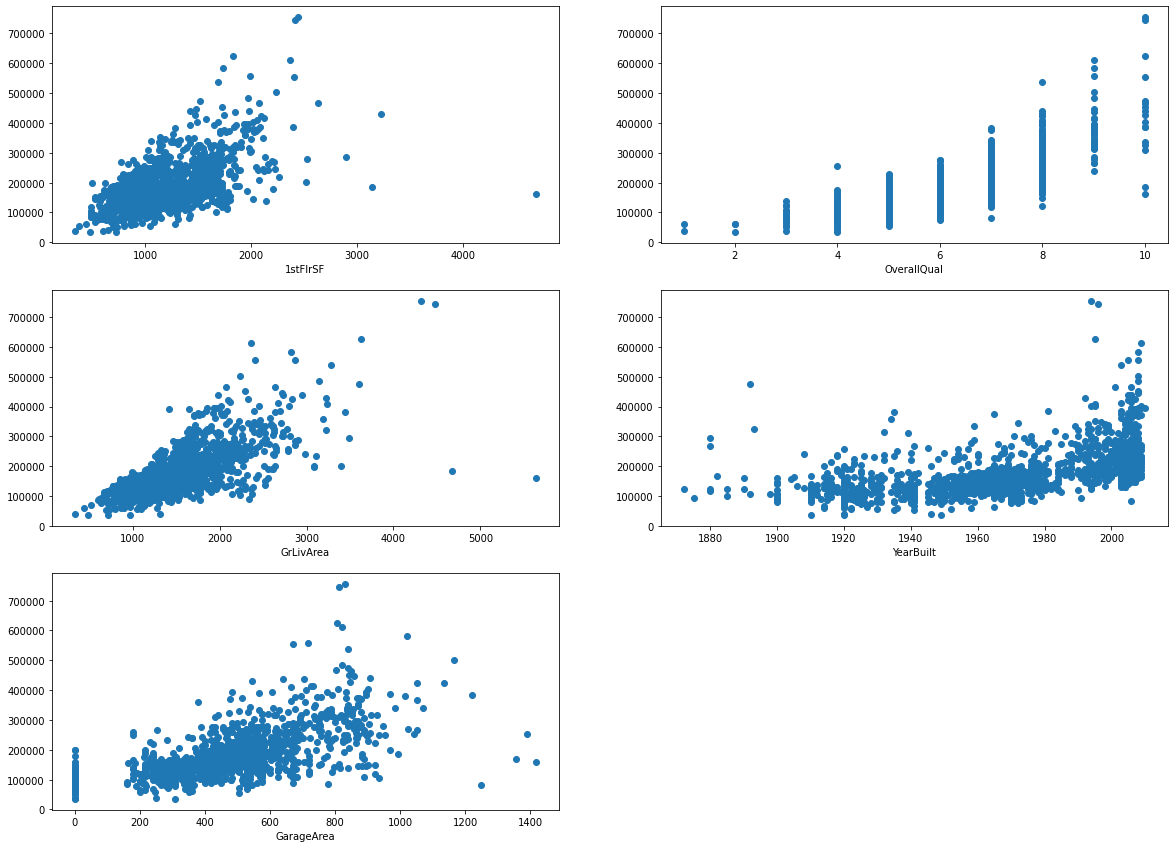

In [6]:
def explore_dependencies(x, *args):
  k = 1
  fig = plt.figure(figsize=(20, 20))
  for i in args: 
    plt.subplot(4,2,k)
    plt.scatter(train_set_raw[i],x)
    plt.xlabel(i)
    k = k+1
  plt.show()

#create scatter plots for variable with highest impact on 'SalePrice'
#'TotalBsmtSF' and '1stFlrSF' show strong correlaton and hence contain the same information
#so we can use only one of them for 'SalePrice'  
explore_dependencies(train_set_raw['SalePrice'],'1stFlrSF', 'OverallQual', 'GrLivArea', 'YearBuilt', 'GarageArea')


In the next step we can use seaborn for some more sophisticated plots

In [0]:
sns.set()
columns = ['SalePrice','1stFlrSF', 'OverallQual', 'GrLivArea', 'YearBuilt', 'GarageArea']
#sns.pairplot(train_set_raw[columns], height=3)

In [8]:
missing_data = train_set_raw.isnull().sum().sort_values(ascending=False)
type(missing_data)
#Checking if any of the features in variable 'columns' has missing values
missing_data.head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
dtype: int64

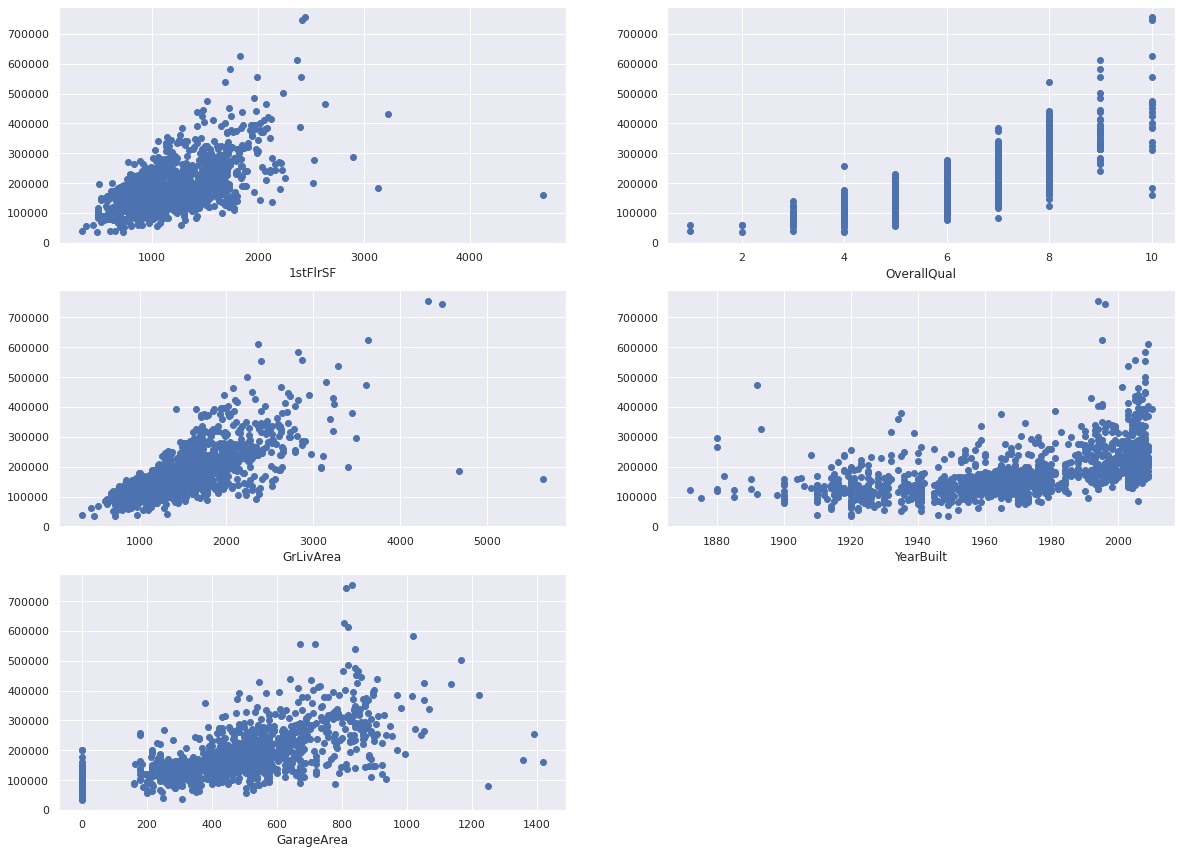

In [9]:
#checking for any outliers
#there are many ways to check for outliers, but one of the easiest is analyzing
#scatter plots
explore_dependencies(train_set_raw['SalePrice'],'1stFlrSF', 'OverallQual', 'GrLivArea', 'YearBuilt', 'GarageArea')

In [0]:
#We shall remove some outliers
#Outliers for 'GrLivArea' -> outliers > 4000
train_set_raw.drop(train_set_raw[train_set_raw['GrLivArea']>4000].index, inplace=True)
#outliers for 'GarageArea' -> outliers > 1200
train_set_raw.drop(train_set_raw[(train_set_raw['GarageArea']>1200) & (train_set_raw['SalePrice']<300000)].index, inplace=True)

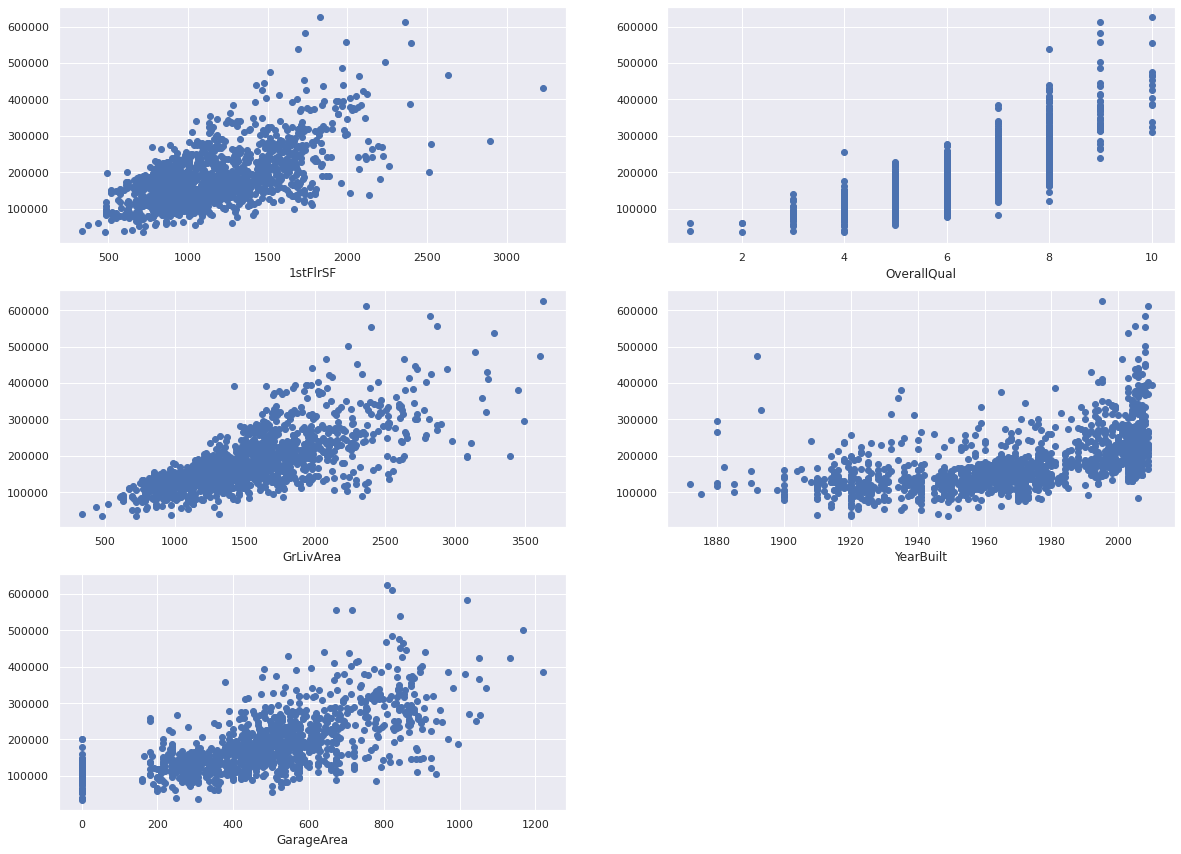

In [11]:
#Plotting without the outliers
explore_dependencies(train_set_raw['SalePrice'],'1stFlrSF', 'OverallQual', 'GrLivArea', 'YearBuilt', 'GarageArea')

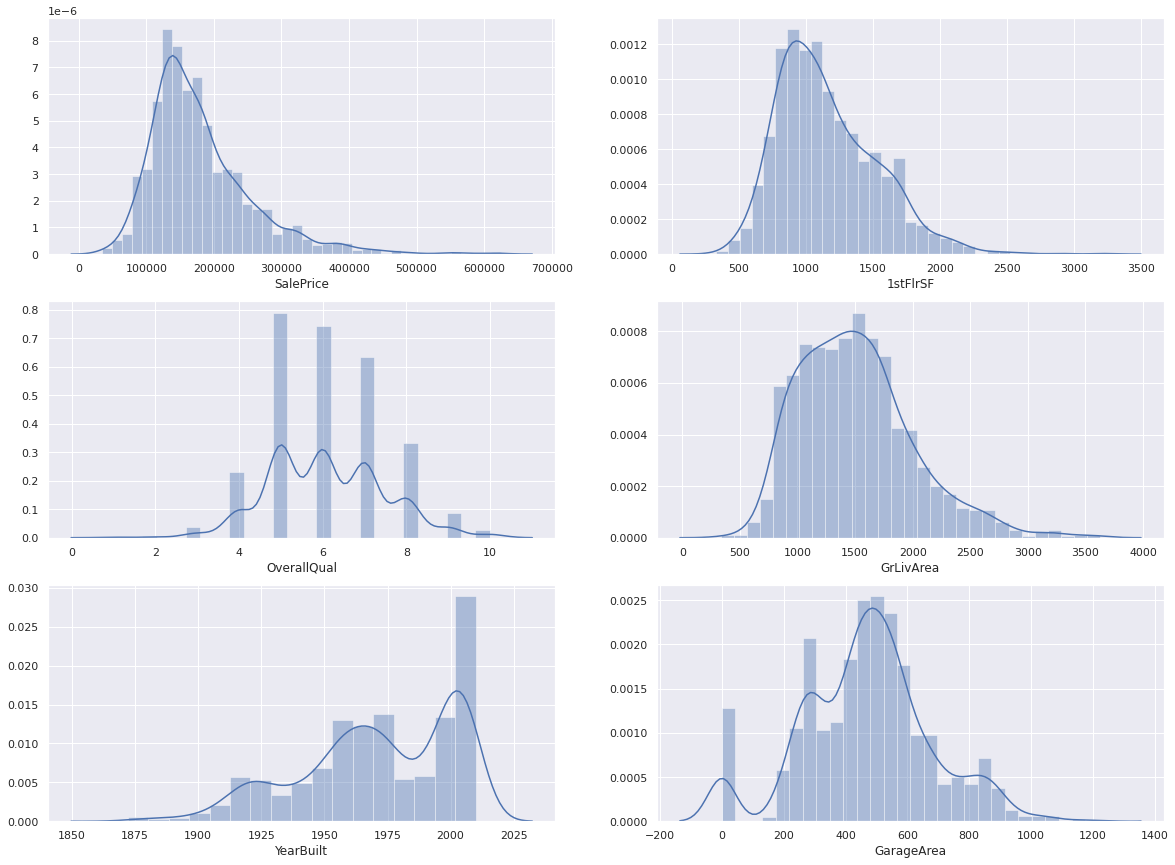

In [12]:
#creating a function that plots chosen features as histogramm
def explore_dependencies_hist(*args):
  k = 1
  fig = plt.figure(figsize=(20, 20))
  for i in args: 
    plt.subplot(4,2,k)
    sns.distplot(train_set_raw[i])
    k = k+1
  plt.show()
explore_dependencies_hist('SalePrice','1stFlrSF', 'OverallQual', 'GrLivArea', 'YearBuilt', 'GarageArea')

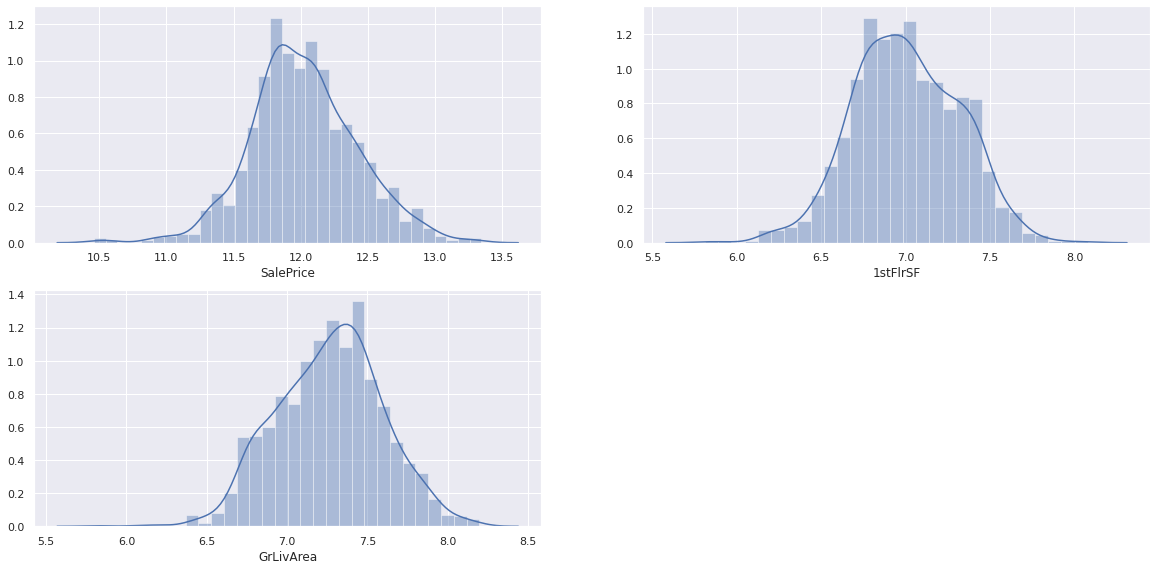

In [13]:
#removing skewness by log-transformation

def remove_skewness(*args):
  for i in args:
    train_set_raw[i] = np.log(train_set_raw[i])

remove_skewness('SalePrice','1stFlrSF', 'GrLivArea')
explore_dependencies_hist('SalePrice','1stFlrSF', 'GrLivArea')

In [14]:
train_set = train_set_raw[['1stFlrSF', 'OverallQual', 'GrLivArea', 'YearBuilt', 'GarageArea']]
train_target = train_set_raw['SalePrice']
train_target.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

**Generating a model**

In [15]:
#Splitting train data in train data and test data
X_train, X_test, y_train, y_test = train_test_split(train_set, train_target, test_size = .33, random_state = 0)

#creating a linear regresson model
linear_reg = LinearRegression(normalize=True)
linear_reg.fit(X_train, y_train)
y_predict = linear_reg.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
print('Mean Squared Error:'+ str(mse))

Mean Squared Error:0.022749800803505093
